In [112]:
import pandas as pd
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import duckdb as db

In [113]:
all_matches = pd.read_csv('Full_match_outcome.csv')
all_matches

,Unnamed: 0,match_id,competition,season,home_team,away_team,home_score,away_score,home_win,away_win,...,t1_t1_entropy,t2_t2_entropy,t1_t2_entropy,t2_t1_entropy,total_entropy,team1_entropy_segment,team2_entropy_segment,SEI,Home_Win_Pred,away_Win_Pred
0,0,15946,La Liga,2018/2019,Barcelona,Deportivo Alavés,3,0,1,0,...,6.884968,1.652269,1.232094,1.135241,10.904572,0.622502,0.160403,0.462099,1,0
1,1,15956,La Liga,2018/2019,Real Valladolid,Barcelona,0,1,0,1,...,3.469568,4.994467,0.831541,1.223273,10.518850,0.367084,0.437570,-0.070486,0,1
2,2,15973,La Liga,2018/2019,Barcelona,Huesca,8,2,1,0,...,6.008893,2.535022,0.959982,1.002560,10.506456,0.575976,0.237230,0.338747,1,0
3,3,15978,La Liga,2018/2019,Real Sociedad,Barcelona,1,2,0,1,...,2.768963,5.638493,1.154647,1.067252,10.629355,0.252279,0.538686,-0.286407,0,1
4,4,15986,La Liga,2018/2019,Barcelona,Girona,2,2,0,0,...,5.822328,2.798942,1.165969,1.036201,10.823440,0.525947,0.270590,0.255358,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682,682,9700,La Liga,2017/2018,Barcelona,Celta Vigo,2,2,0,0,...,5.502583,2.924616,1.417909,1.197818,11.042926,0.478360,0.284771,0.193589,1,0
683,683,266952,La Liga,2016/2017,Barcelona,Villarreal,4,1,1,0,...,5.298429,2.678190,1.585246,1.313722,10.875586,0.462219,0.271223,0.190996,1,0
684,684,267561,La Liga,2014/2015,Rayo Vallecano,Barcelona,0,2,0,1,...,3.190862,4.711522,1.276957,1.137066,10.316407,0.295740,0.470262,-0.174522,0,1
685,685,69243,La Liga,2009/2010,Barcelona,Sevilla,4,0,1,0,...,5.713168,2.247884,1.437068,1.291852,10.689972,0.520858,0.223864,0.296994,1,0


In [114]:
db.query('''select * from all_matches where match_id = 18244''').df()

,Unnamed: 0,match_id,competition,season,home_team,away_team,home_score,away_score,home_win,away_win,...,t1_t1_entropy,t2_t2_entropy,t1_t2_entropy,t2_t1_entropy,total_entropy,team1_entropy_segment,team2_entropy_segment,SEI,Home_Win_Pred,away_Win_Pred
0,38,18244,Champions League,2016/2017,Juventus,Real Madrid,1,4,0,1,...,3.446038,4.912324,0.966998,0.932563,10.257923,0.332582,0.482238,-0.149656,0,1


In [115]:
match_test = pd.read_csv('data/match_calculations/18244.csv') #3749079, 3749346, 3749253
match_test
#data\match_calculations\16149.csv
#data\match_calculations\18244.csv

,Unnamed: 0,id,index,period,timestamp,minute,second,type,possession,possession_team,...,indv_prob,t1_t1_entropy,t2_t2_entropy,t1_t2_entropy,t2_t1_entropy,total_entropy,N_count,team1_entropy_segment,team2_entropy_segment,SEI
0,0,0436bcd0-e185-48c4-a6a8-1e7bc61d1032,1,1,2023-04-30 00:00:00.000,0,0,Starting XI,1,Juventus,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,1,e2711d47-5d90-4967-b531-5aa74ac03a20,2,1,2023-04-30 00:00:00.000,0,0,Starting XI,1,Juventus,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2,7910a233-ec39-4332-9c39-f647bb837438,3,1,2023-04-30 00:00:00.000,0,0,Half Start,1,Juventus,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,3,5dfef236-0be2-4c92-a814-9f07c23418af,4,1,2023-04-30 00:00:00.000,0,0,Half Start,1,Juventus,...,0.000000,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,4,da4e9849-f967-420b-9f34-bb3ea489aa40,5,1,2023-04-30 00:00:01.235,0,1,Pass,2,Juventus,...,0.000075,0.001022,NaN,NaN,NaN,0.001022,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,3395,553ec774-2219-41cc-bb23-0c78217aae8d,3396,2,2023-04-30 00:48:36.139,93,36,Foul Won,183,Juventus,...,0.001193,3.446038,4.907810,0.966998,0.932563,10.253408,29.0,0.521348,0.663913,-0.142564
3396,3396,9e5dde0d-81cb-4152-b572-756b3c49f47e,3397,2,2023-04-30 00:48:55.067,93,55,Pass,184,Real Madrid,...,0.000075,3.446038,4.908832,0.966998,0.932563,10.254431,29.0,0.521296,0.663946,-0.142650
3397,3397,78e48f71-f9bb-46d8-8f27-2fa83c168c41,3398,2,2023-04-30 00:48:57.343,93,57,Ball Receipt*,184,Real Madrid,...,0.000298,3.446038,4.912324,0.966998,0.932563,10.257923,29.0,0.521119,0.664061,-0.142942
3398,3398,7871c89b-c0d8-4c03-bfb1-f3a23aa77b93,3399,2,2023-04-30 00:49:01.679,94,1,Half End,184,Real Madrid,...,0.000000,3.446038,4.912324,0.966998,0.932563,10.257923,29.0,0.521119,0.664061,-0.142942


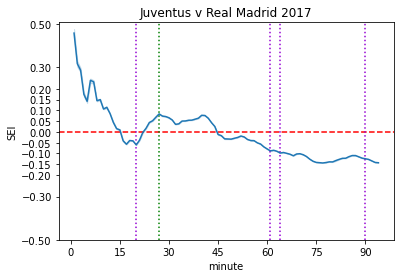

In [124]:
match = pd.read_csv(i)
line = sns.lineplot(data=match_test, x="minute", y="SEI")
line.set_yticks([-.5,-.3,-.2,-.15,-.1,-.05,0, .5,.3,.2,.15,.1,.05])
line.set_xticks([0, 15, 30, 45, 60, 75,90])
line.axhline(0, color='red', linestyle ="--", zorder=1)
line.axvline(27, color='green', linestyle =":", zorder=1)
line.axvline(20, color='darkviolet', linestyle =":", zorder=1)
line.axvline(61, color='darkviolet', linestyle =":", zorder=1)
line.axvline(64, color='darkviolet', linestyle =":", zorder=1)
line.axvline(90, color='darkviolet', linestyle =":", zorder=1)
plt.title('Juventus v Real Madrid 2017')
plt.savefig('Juve_Real_Madrid.png')
plt.show()

data\match_calculations\15946.csv


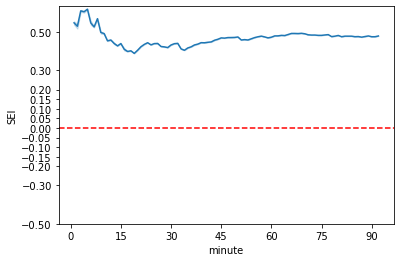

data\match_calculations\15956.csv


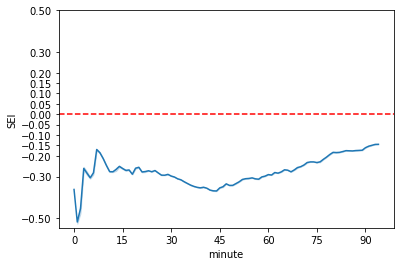

data\match_calculations\15973.csv


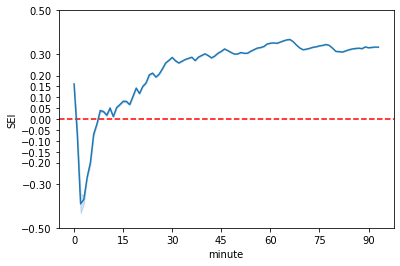

data\match_calculations\15978.csv


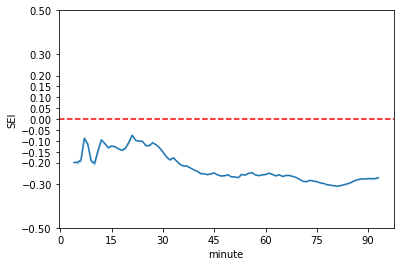

data\match_calculations\15986.csv


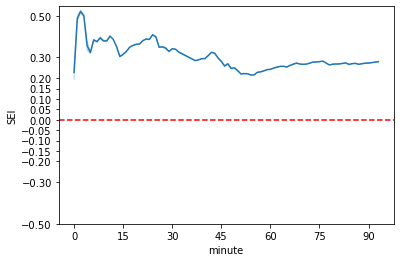

data\match_calculations\15998.csv


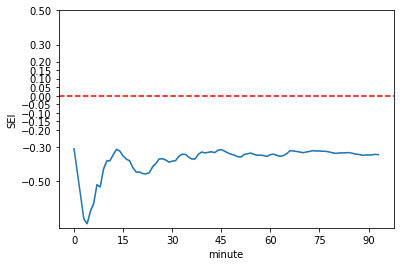

data\match_calculations\16010.csv


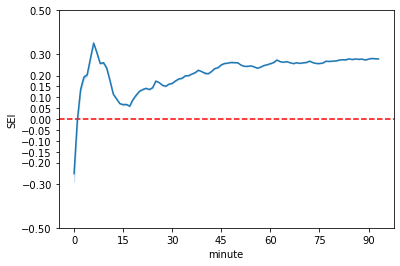

data\match_calculations\16023.csv


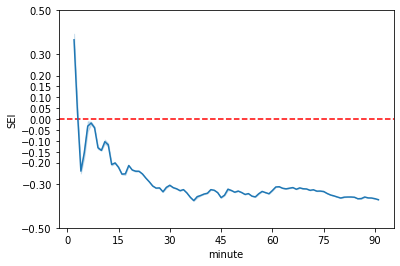

data\match_calculations\16029.csv


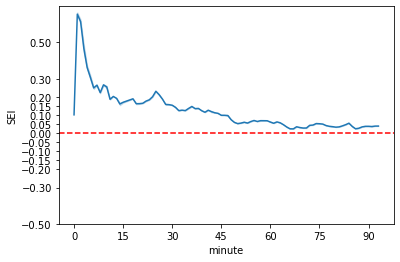

data\match_calculations\16056.csv


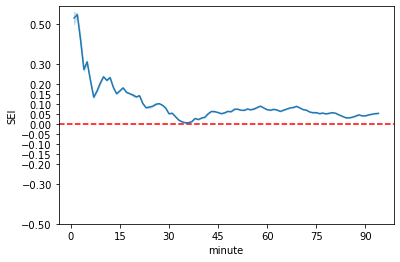

data\match_calculations\16073.csv


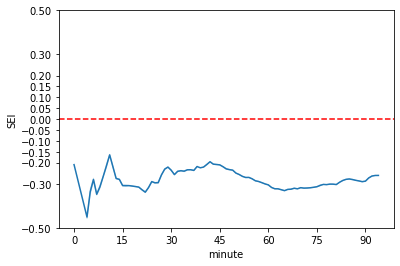

data\match_calculations\16079.csv


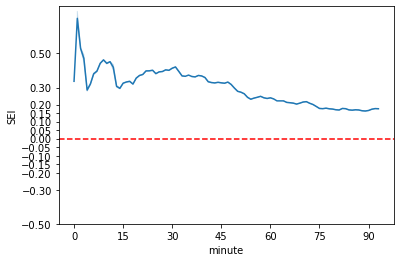

data\match_calculations\16086.csv


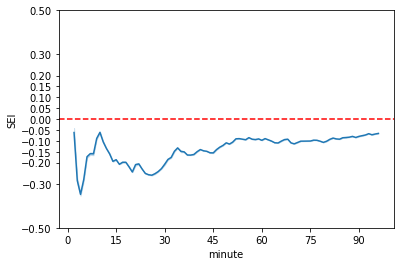

data\match_calculations\16095.csv


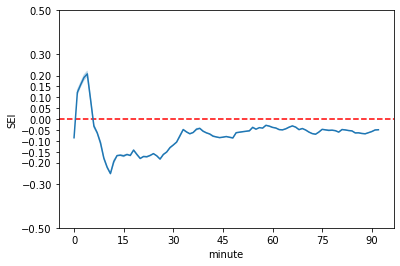

data\match_calculations\16109.csv


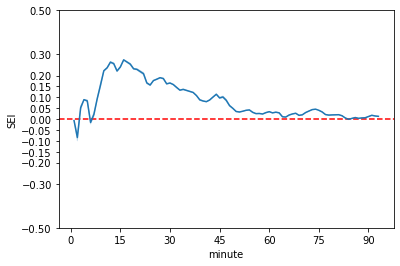

data\match_calculations\16120.csv


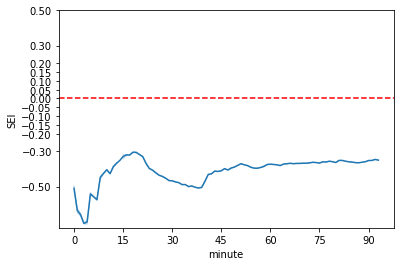

data\match_calculations\16131.csv


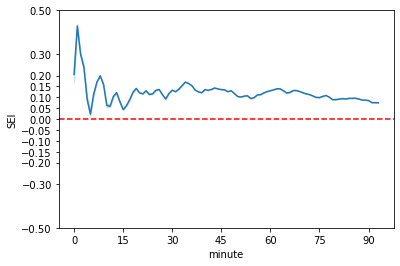

data\match_calculations\16136.csv


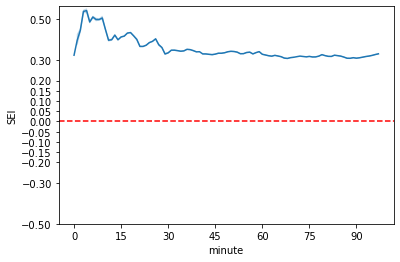

data\match_calculations\16149.csv


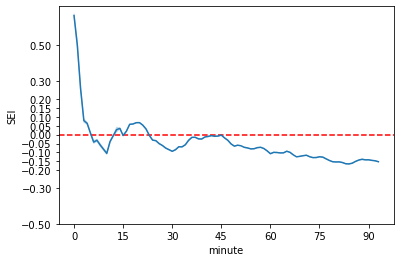

data\match_calculations\16157.csv


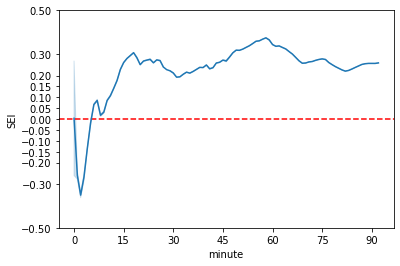

data\match_calculations\16173.csv


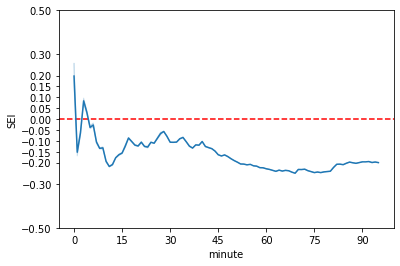

data\match_calculations\16182.csv


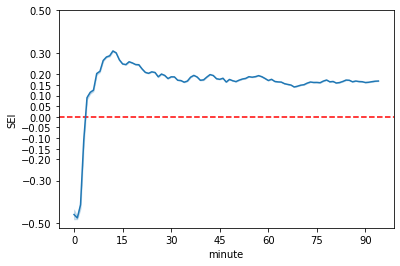

data\match_calculations\16190.csv


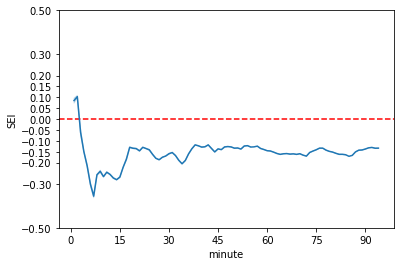

data\match_calculations\16196.csv


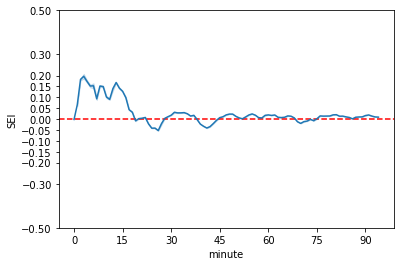

data\match_calculations\16205.csv


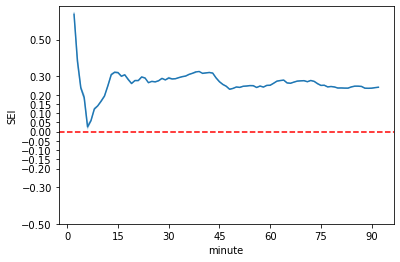

data\match_calculations\16215.csv


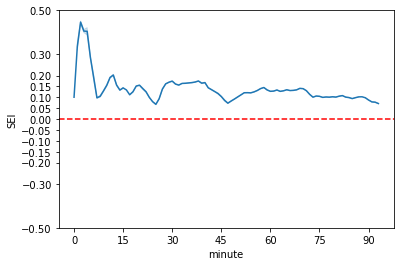

data\match_calculations\16231.csv


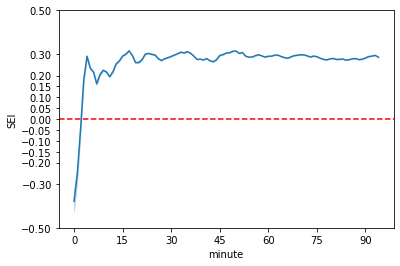

data\match_calculations\16240.csv


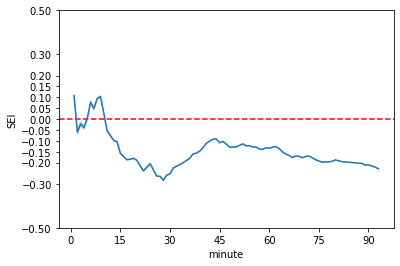

data\match_calculations\16248.csv


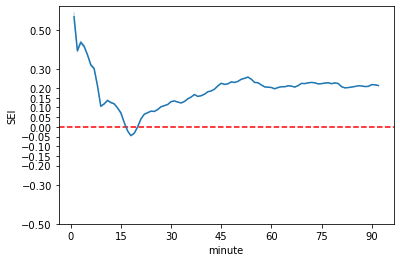

data\match_calculations\16265.csv


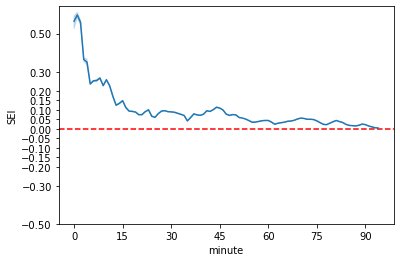

data\match_calculations\16275.csv


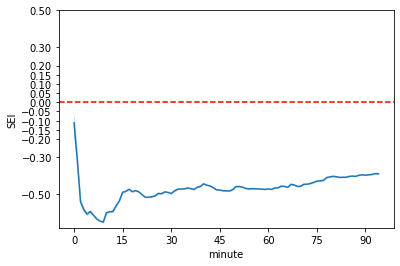

data\match_calculations\16289.csv


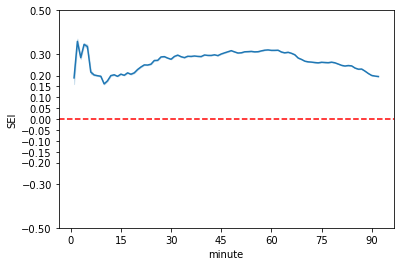

data\match_calculations\16306.csv


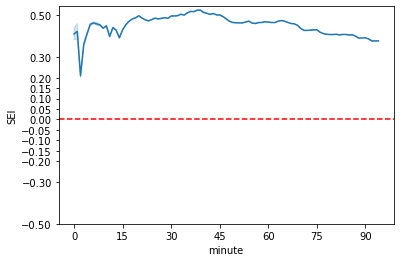

data\match_calculations\16317.csv


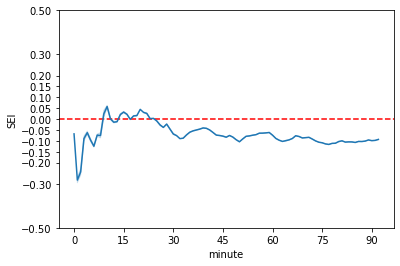

data\match_calculations\18235.csv


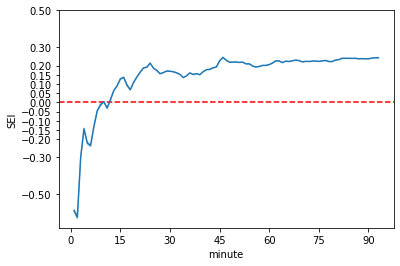

data\match_calculations\18236.csv


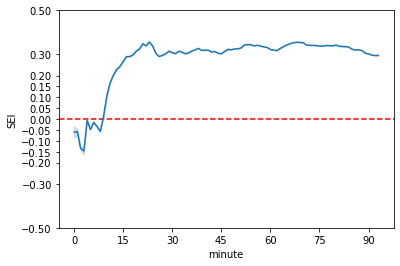

data\match_calculations\18237.csv


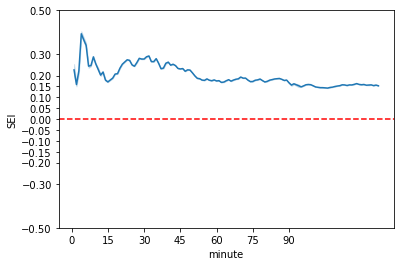

data\match_calculations\18240.csv


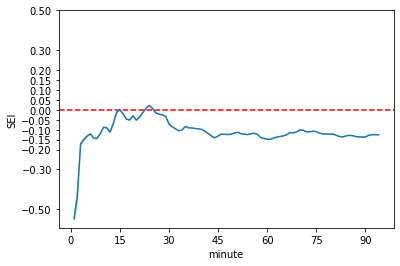

data\match_calculations\18241.csv


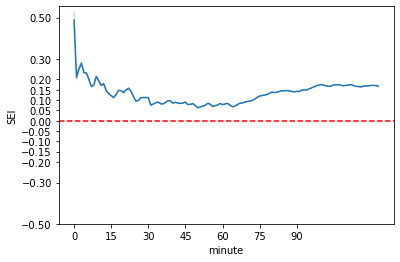

data\match_calculations\18242.csv


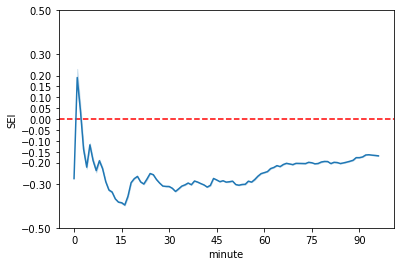

data\match_calculations\18243.csv


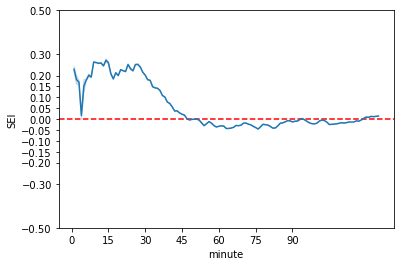

data\match_calculations\18244.csv


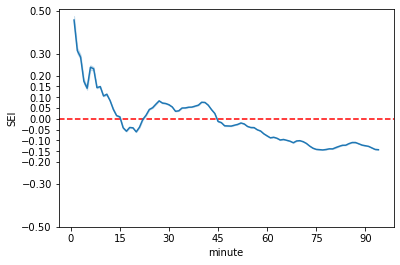

data\match_calculations\18245.csv


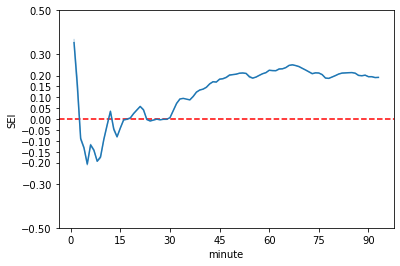

data\match_calculations\22536.csv


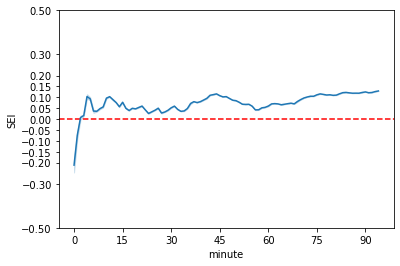

data\match_calculations\22912.csv


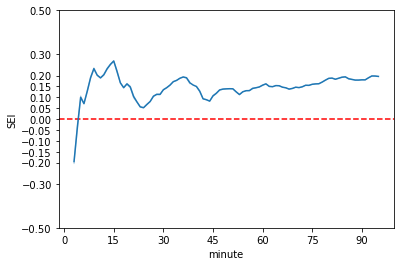

data\match_calculations\2302764.csv


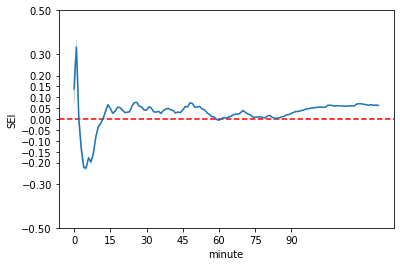

data\match_calculations\265830.csv


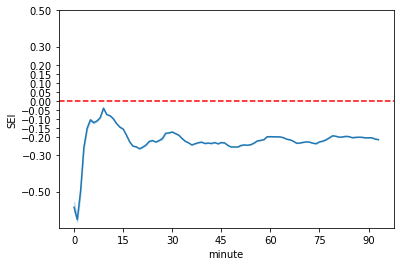

data\match_calculations\265835.csv


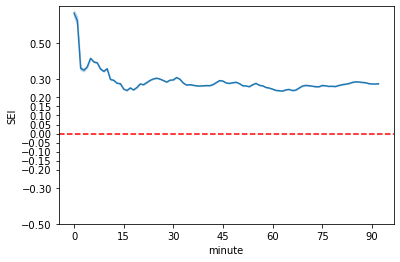

data\match_calculations\265837.csv


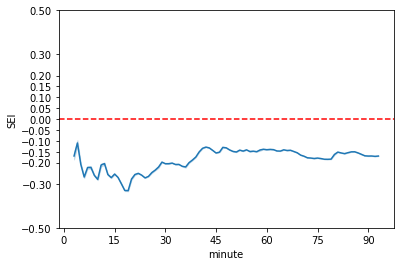

data\match_calculations\265839.csv


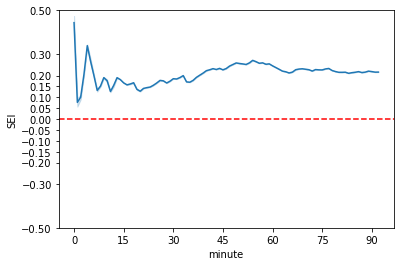

data\match_calculations\265857.csv


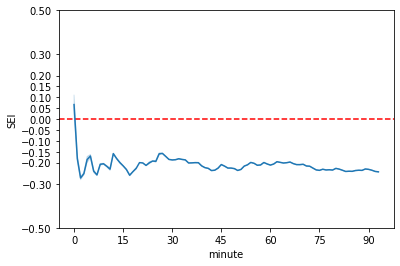

data\match_calculations\265866.csv


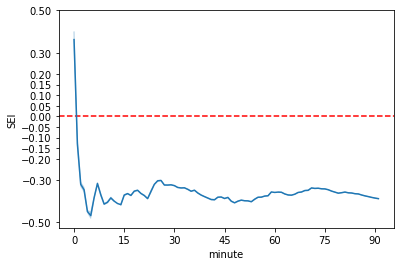

data\match_calculations\265894.csv


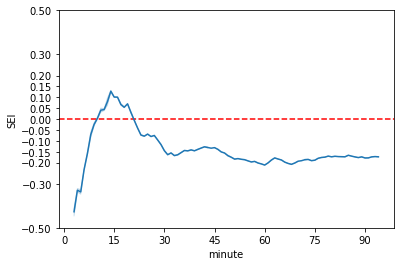

data\match_calculations\265896.csv


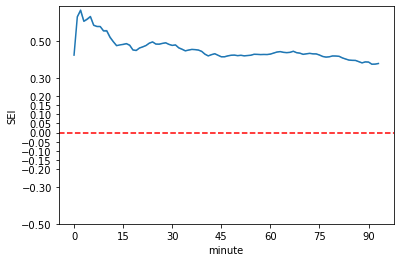

data\match_calculations\265905.csv


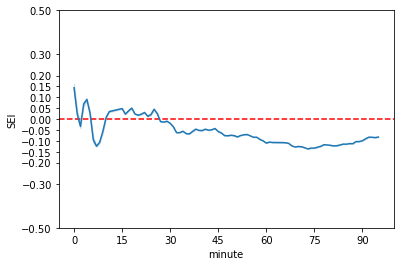

data\match_calculations\265918.csv


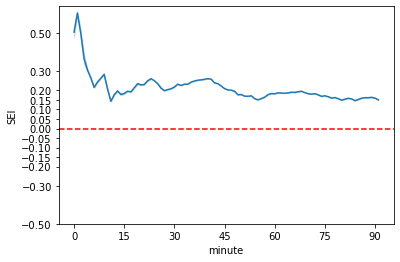

data\match_calculations\265944.csv


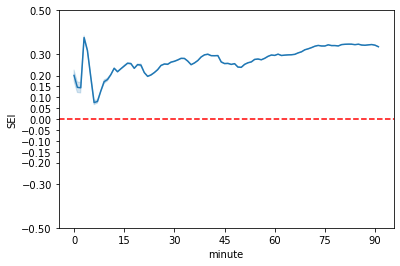

data\match_calculations\265952.csv


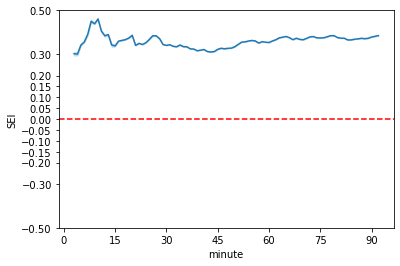

data\match_calculations\265958.csv


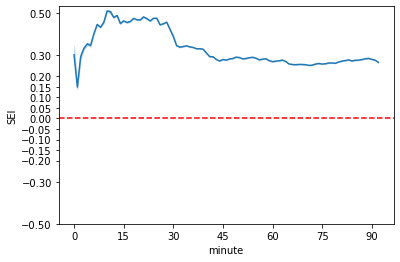

data\match_calculations\265963.csv


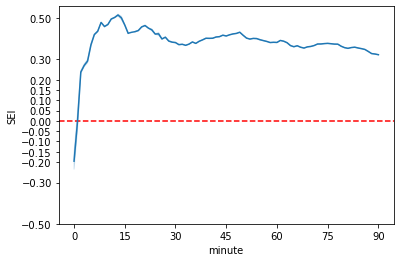

data\match_calculations\266015.csv


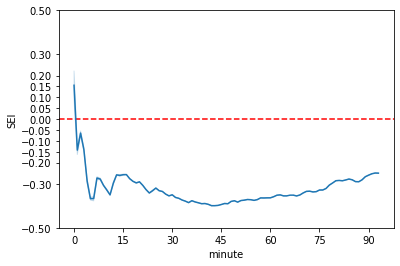

data\match_calculations\266033.csv


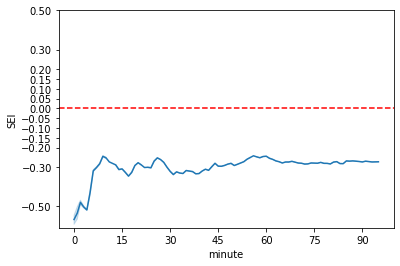

data\match_calculations\266045.csv


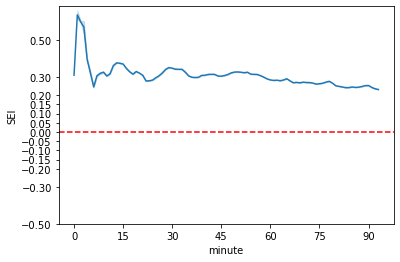

data\match_calculations\266056.csv


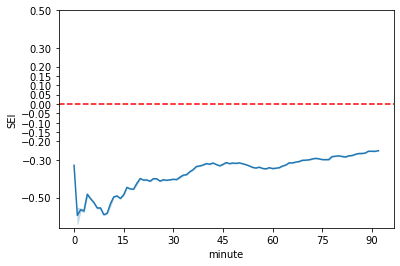

data\match_calculations\266066.csv


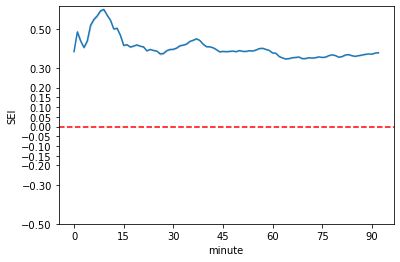

data\match_calculations\266074.csv


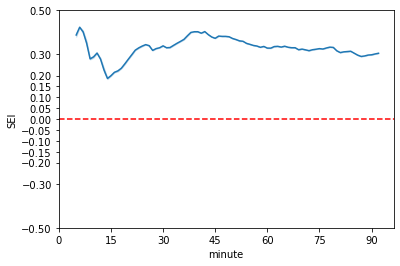

data\match_calculations\266106.csv


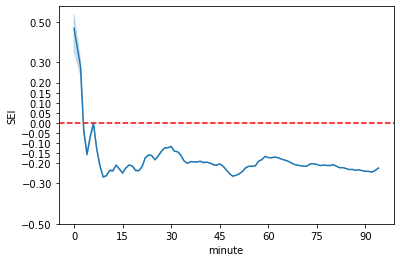

data\match_calculations\266117.csv


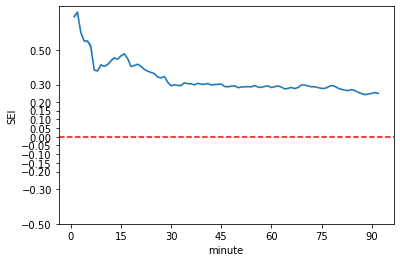

data\match_calculations\266142.csv


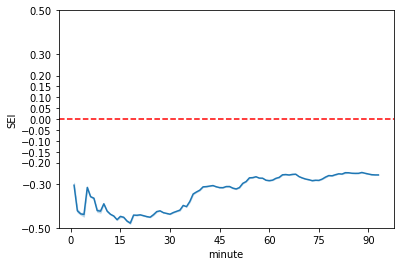

data\match_calculations\266148.csv


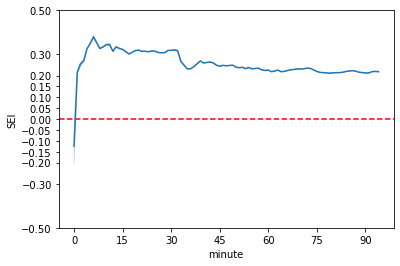

data\match_calculations\266149.csv


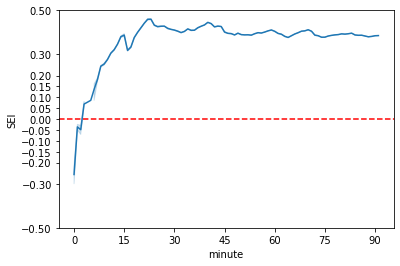

data\match_calculations\266160.csv


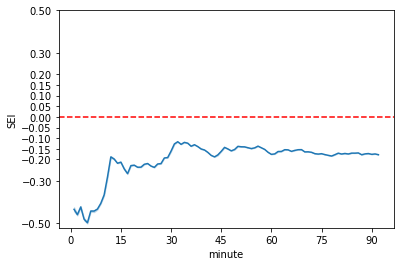

data\match_calculations\266166.csv


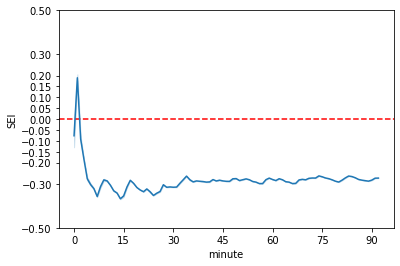

data\match_calculations\266191.csv


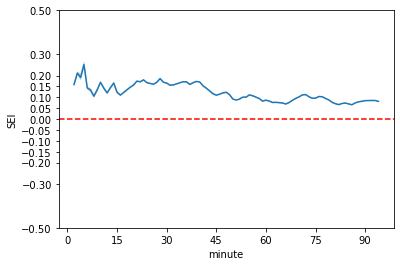

data\match_calculations\266201.csv


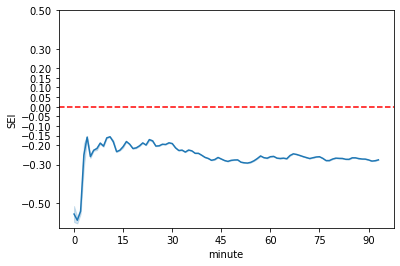

data\match_calculations\266230.csv


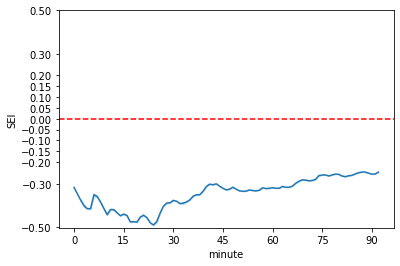

data\match_calculations\266234.csv


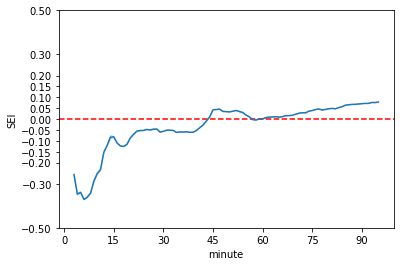

data\match_calculations\266236.csv


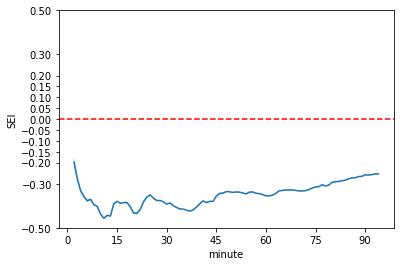

data\match_calculations\266240.csv


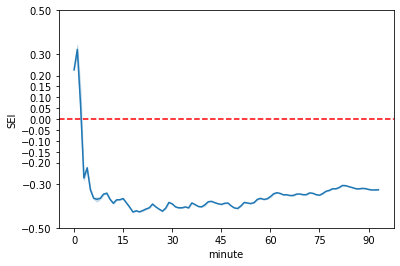

data\match_calculations\266254.csv


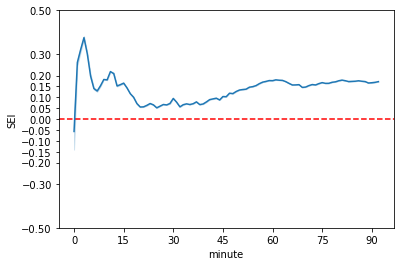

data\match_calculations\266256.csv


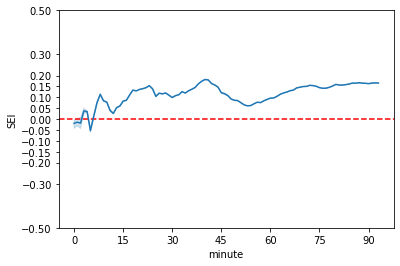

data\match_calculations\266273.csv


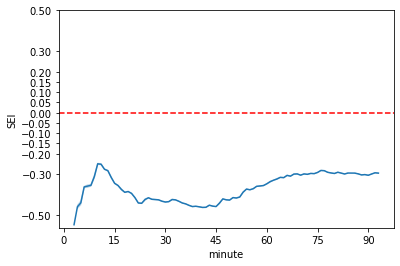

data\match_calculations\266274.csv


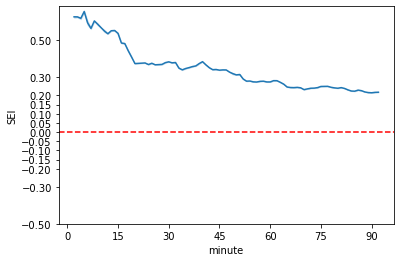

data\match_calculations\266280.csv


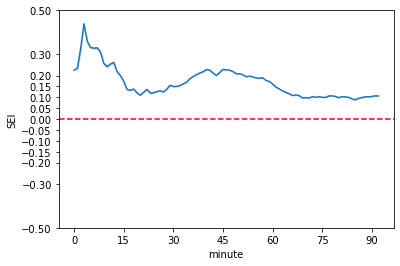

data\match_calculations\266299.csv


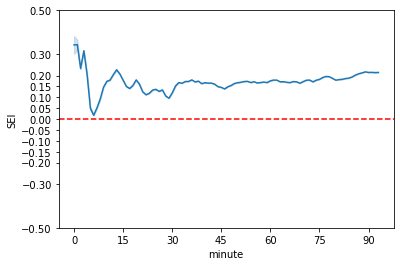

data\match_calculations\266310.csv


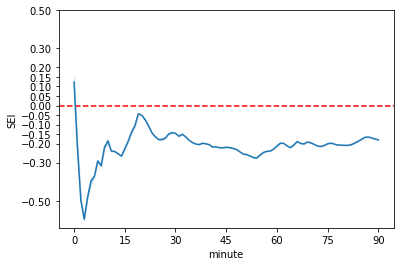

data\match_calculations\266320.csv


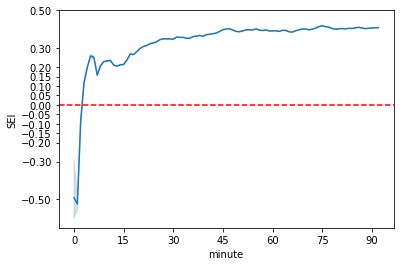

data\match_calculations\266357.csv


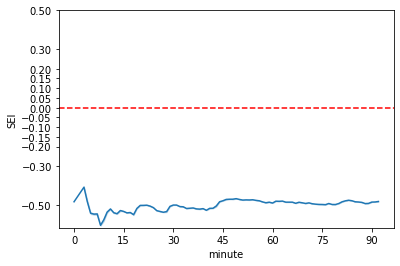

data\match_calculations\266406.csv


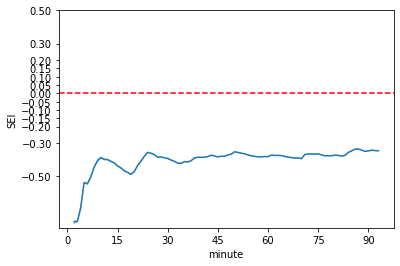

data\match_calculations\266420.csv


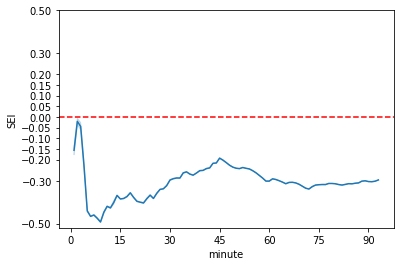

data\match_calculations\266424.csv


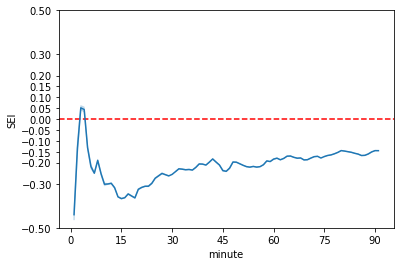

data\match_calculations\266433.csv


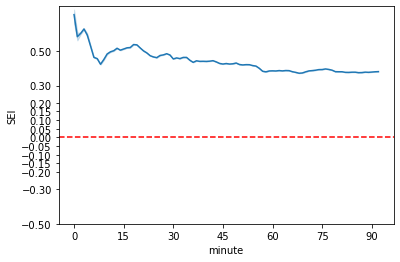

data\match_calculations\266440.csv


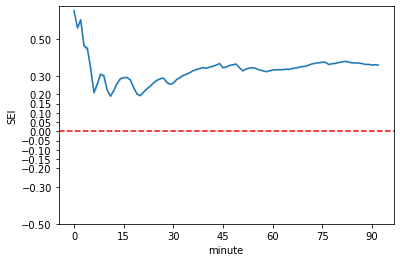

data\match_calculations\266462.csv


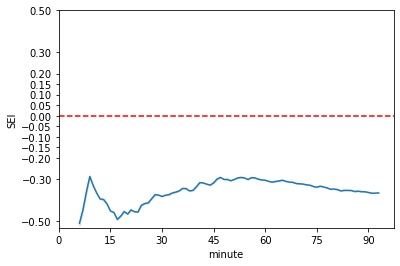

data\match_calculations\266466.csv


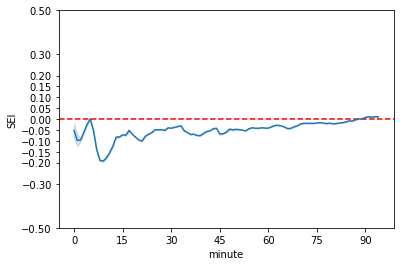

data\match_calculations\266467.csv


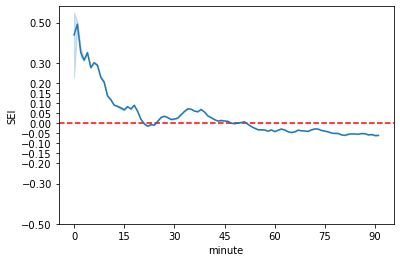

data\match_calculations\266477.csv


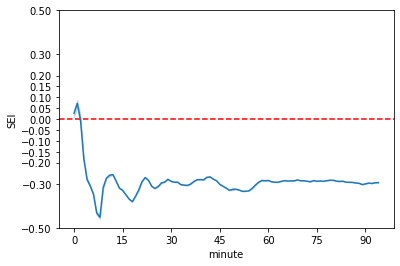

data\match_calculations\266490.csv


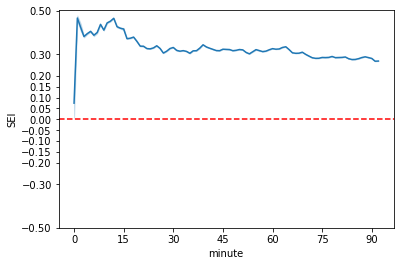

data\match_calculations\266491.csv


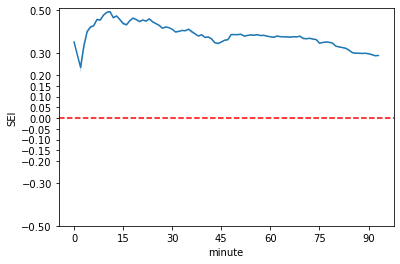

data\match_calculations\266498.csv


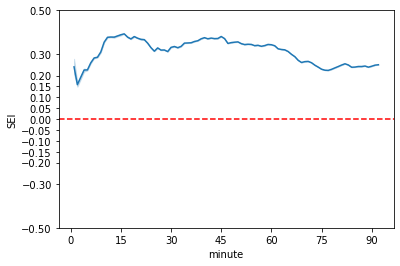

data\match_calculations\266516.csv


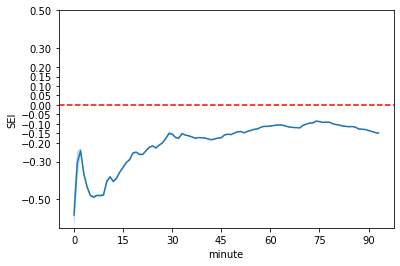

data\match_calculations\266525.csv


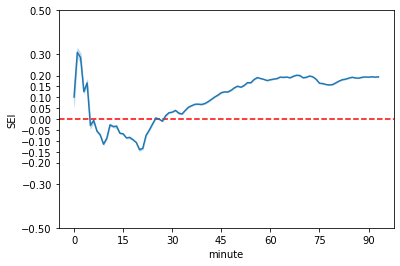

data\match_calculations\266528.csv


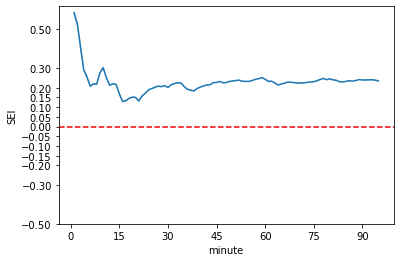

data\match_calculations\266531.csv


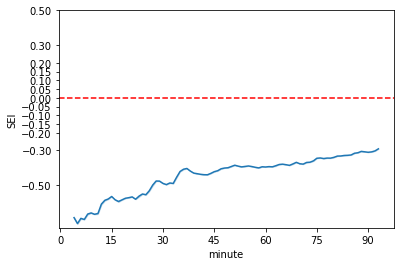

data\match_calculations\266557.csv


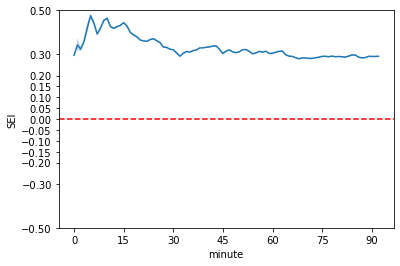

data\match_calculations\266560.csv


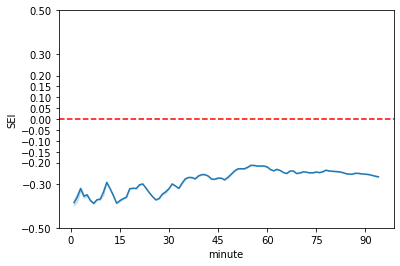

data\match_calculations\266574.csv


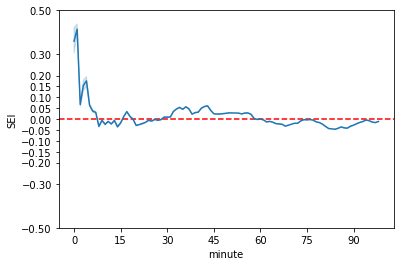

data\match_calculations\266603.csv


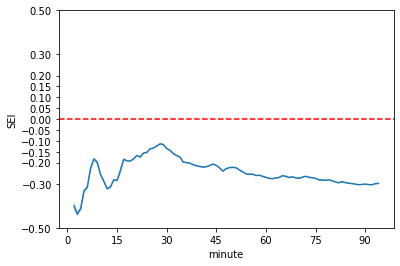

data\match_calculations\266613.csv


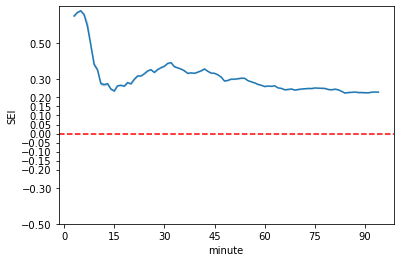

data\match_calculations\266620.csv


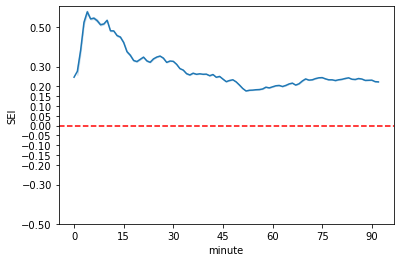

data\match_calculations\266631.csv


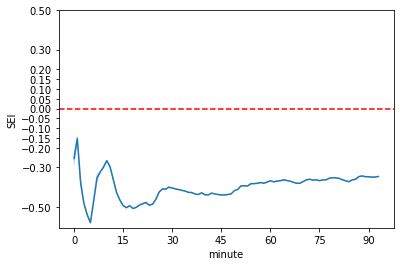

data\match_calculations\266653.csv


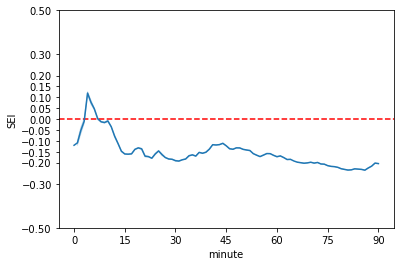

data\match_calculations\266664.csv


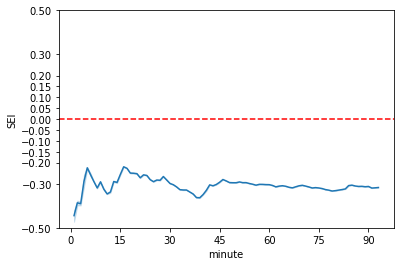

data\match_calculations\266669.csv


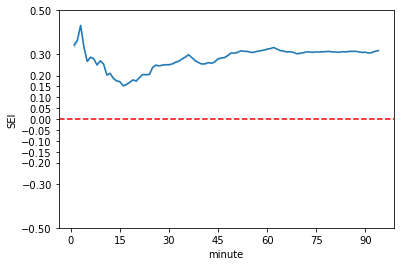

data\match_calculations\266670.csv


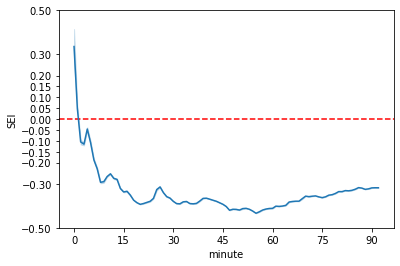

data\match_calculations\266724.csv


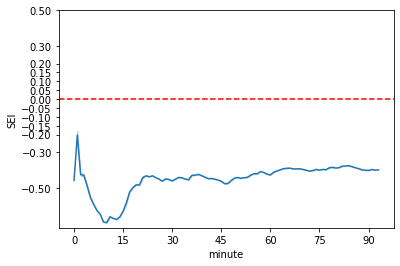

data\match_calculations\266731.csv


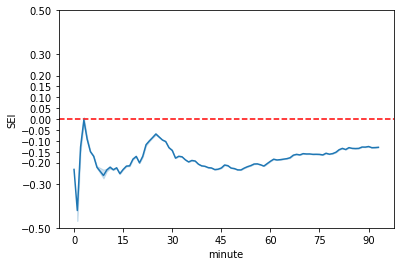

data\match_calculations\266741.csv


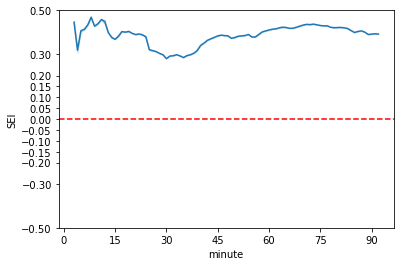

data\match_calculations\266770.csv


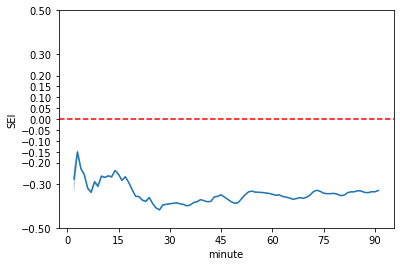

data\match_calculations\266794.csv


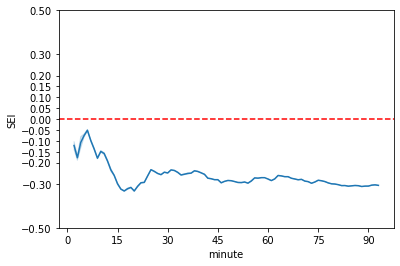

data\match_calculations\266815.csv


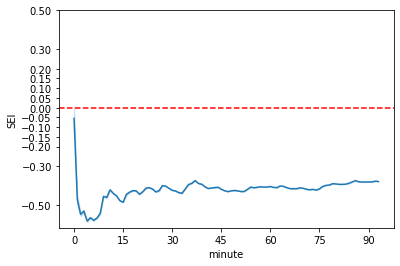

data\match_calculations\266827.csv


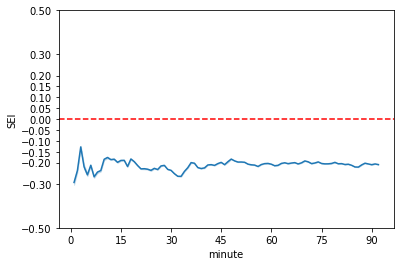

data\match_calculations\266838.csv


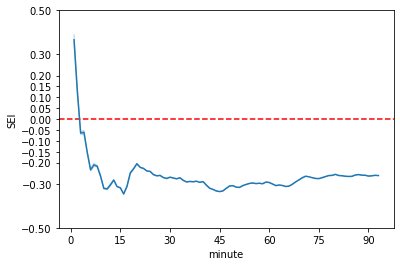

data\match_calculations\266846.csv


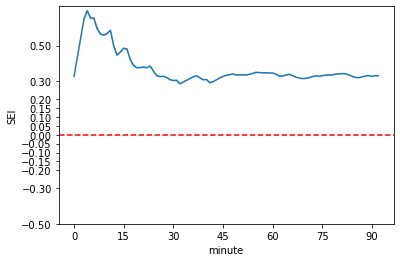

data\match_calculations\266871.csv


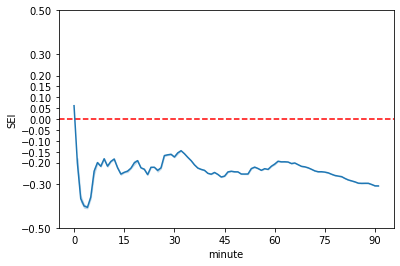

data\match_calculations\266874.csv


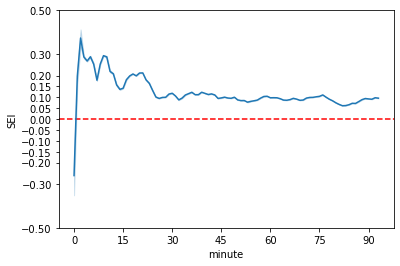

data\match_calculations\266883.csv


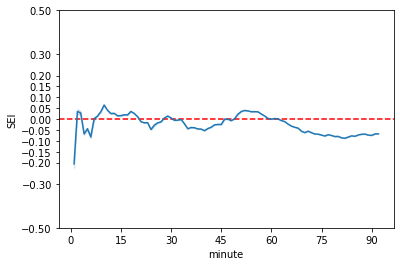

data\match_calculations\266885.csv


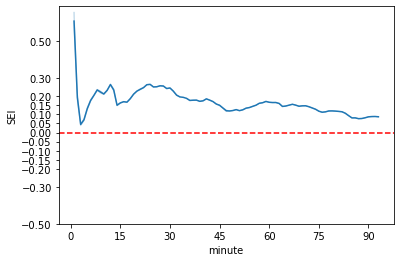

data\match_calculations\266892.csv


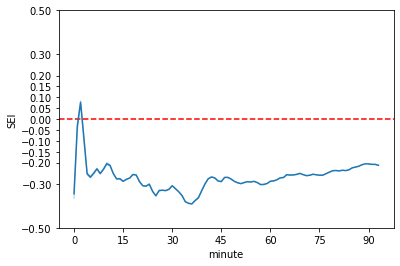

data\match_calculations\266916.csv


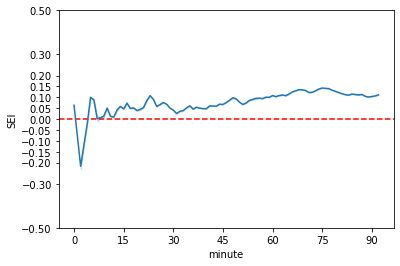

data\match_calculations\266921.csv


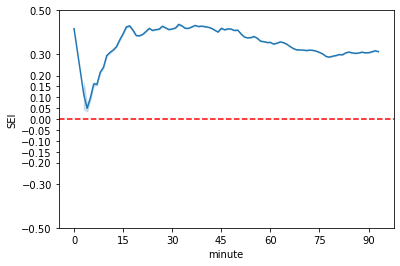

data\match_calculations\266929.csv


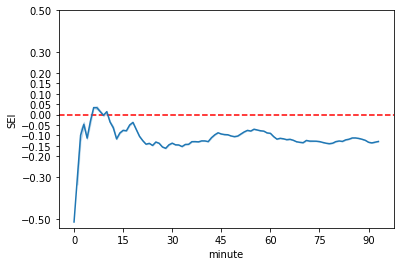

data\match_calculations\266933.csv


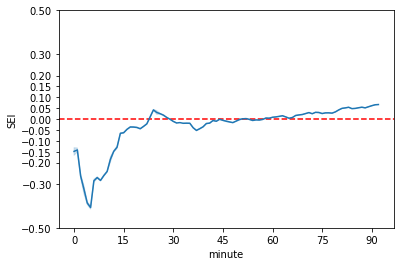

data\match_calculations\266952.csv


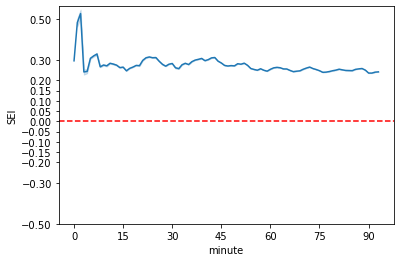

data\match_calculations\266961.csv


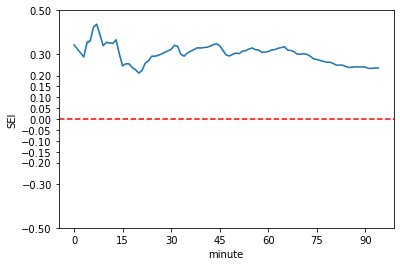

data\match_calculations\266967.csv


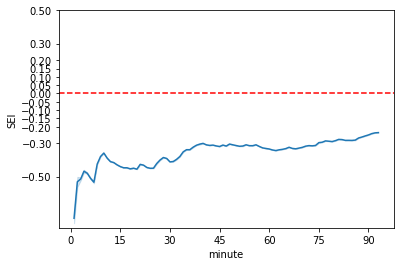

data\match_calculations\266986.csv


KeyboardInterrupt: 

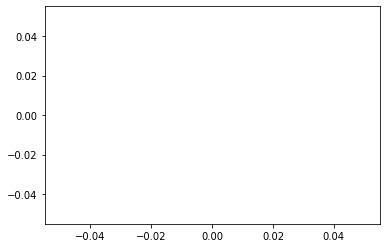

In [110]:
for i in glob.glob('data\match_calculations\*'):
    print(i)
    match = pd.read_csv(i)
    line = sns.lineplot(data=match, x="minute", y="SEI")
    line.set_yticks([-.5,-.3,-.2,-.15,-.1,-.05,0, .5,.3,.2,.15,.1,.05])
    line.set_xticks([0, 15, 30, 45, 60, 75,90])
    line.axhline(0, color='red', linestyle ="--", zorder=1)
    plt.show()
